In [9]:
import numpy as np
from numpy import sin, cos, arcsin, arccos, pi, sqrt, vectorize
from pandas import DataFrame, concat
import quantities as units
from quantities import UnitQuantity, C, N, m, A, mm, V, F, pF, H, ohm, Hz, MHz, S, s, kg, mS, rad, degree, GHz
from sympy import latex
from IPython.display import display, Math

def Units(x, units):
    x.units = units
    return x

epsilon0 = 8.854187817 * 10 ** (-12) * C ** 2 / (N * m ** 2)
mu0 = 4 * pi * 10 ** (-7) * N / (A ** 2)
light_speed = 299792458 * m/s

Np = UnitQuantity('Np', 1);  '''neper is a dimensionless unit that functions
                               like the decible but with base e instead of base 10'''
c_unit = UnitQuantity('c', light_speed)

Ft = UnitQuantity('Ft', 0.304799999536704*m)

dB = UnitQuantity('dB', Np * np.log(10)/20)
nH = UnitQuantity('nH', H * 1e-9)

j = 1j

# Pre-lab Section
Consider the schematic captured from ADS that is shown in Figure 3.1.  Note that a load impedance of 50MΩ is shown, but you will be making calculations and simulations with several different values of load impedance.  Given that the transmission line comprises a coaxial cable with dielectric constant of 2.1, calculate the velocity of propagation and the time that it takes for a disturbance at the generator end of the line to arrive at the load T for a cable of length 1000 feet. Record these values in the appropriate locations in Table 1 for comparison to the values obtained during the simulation experiment.


In [3]:
'''assuming lossless cable, as insufficient information is provided to calculate it for a lossy cable'''
def prop_velocity(epsilon_r):
    return light_speed/sqrt(epsilon_r)

v_p = prop_velocity(2.1).simplified

display(Math(f'\\text{{Velocity of propagation}} = {latex("{:.5E}".format(prop_velocity(2.1).simplified))} = '
             f'{round(Units(v_p, c_unit), 3)}'))

display(Math(f'\\text{{Time}} = {latex("{:.5E}".format((1000*Ft/v_p).simplified))}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Assuming that the transmission line has characteristic impedance $Z_0 = 50 \Omega$
, calculate the reflection coefficient $\Gamma_L$ for the following load terminations:
1. $Z_L = \infty$
2. $Z_L = 100\Omega$

3. $Z_L = 50\Omega$

4. $Z_L = 25\Omega$

5. $Z_L = 0$


# Lab Section

In [46]:
infinity = np.inf
@vectorize
def Gamma_L(Z0, ZL):
  if ZL != infinity:
    sum = ZL+Z0
    difference = ZL-Z0
    return difference/sum
  else:
    return 1

ZL_theory = [100, 50, 25, 0, infinity]
ZL_simulation = [1, ]
display(Math('\\text{Table 1}'))
DataFrame({ 'Z_L (Ohms)':ZL_theory, 'Gamma_L (Theory)': Gamma_L(Z0 = 50, ZL = ZL_theory) * ohm}).\
reindex([4, 0, 1, 2, 3]).reset_index(drop = True)


<IPython.core.display.Math object>

,Z_L (Ohms),Gamma_L (Theory)
0,inf,1.000000
1,100.0,0.333333
2,50.0,0.000000
3,25.0,-0.333333
4,0.0,-1.000000


## Plots

$Z_L = \infty$

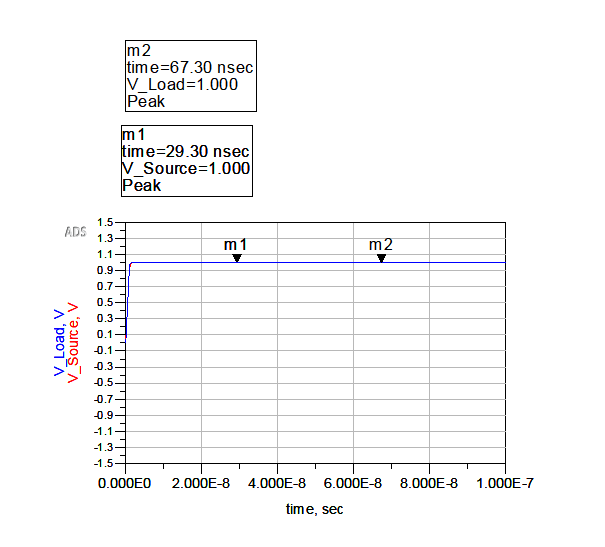

$Z = 100 \Omega$

![image.png](attachment:image.png)

$Z = 50 \Omega$

![image.png](attachment:image.png)

$Z = 25 \Omega$

![image.png](attachment:image.png)

$Z = 0$

![image-2.png](attachment:image-2.png)

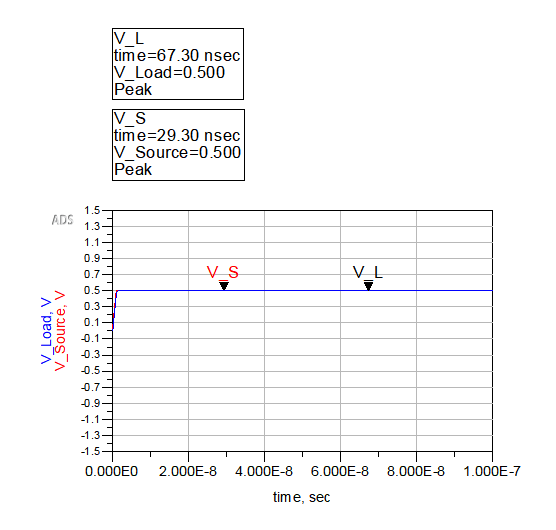

$Z = 25 \Omega$

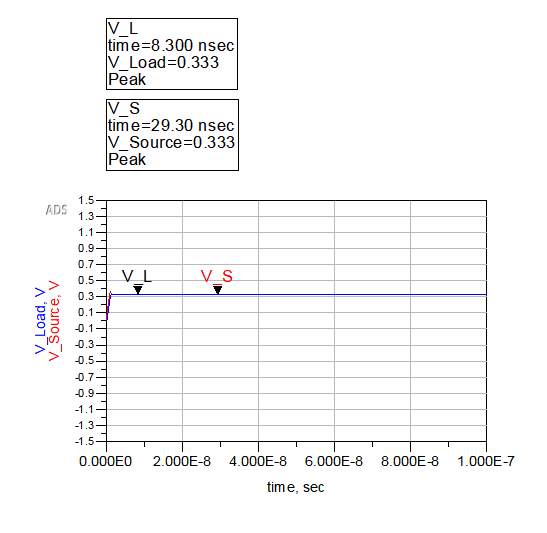

$Z = 0$

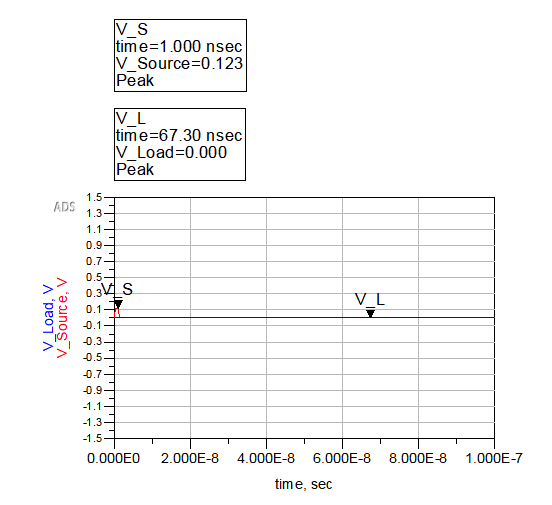